# III. Machine Learning Algorithm for Classification

Within the lecture you have gained a broad understanding about classification tasks based on machine learning algorithms. The most basic algorithm you will have come across are the Bayesian Classifier, AdaBoosting and .....
During the course of this study we will try to implement both classifiers from scratch. 

Lets start!



# 1. Generating synthetic data

For this lets first create artificial data on which we want to apply the classification tasks later on. `Sklearn` already provides a sample generator, so that you can easily create synthetic data by using `make_classification`, `make_blobs`, and `make_gaussian_quantile`.

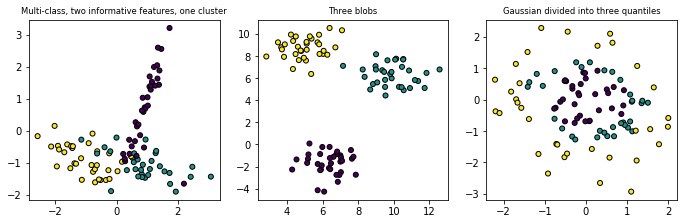

In [21]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(10, 10))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
plt.subplot(331)
plt.title("Multi-class, two informative features, one cluster",
          fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(332)
plt.title("Three blobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(333)
plt.title("Gaussian divided into three quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.show()

**Exercise 1:** 

**a.)** Lets try to implement `make_blobs` by yourself. For this create three blobs as in the above code, assuming that the data is normally distributed 

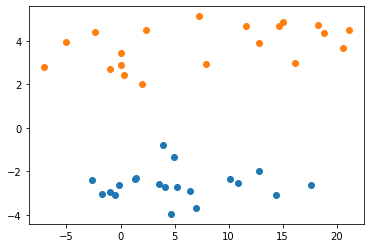

In [29]:
center1 = (5.5,-2)
center2 = (8, 4)
distance = 1


x1 = np.random.normal(center1[0], center1[0] + distance, size=(20,))
y1 = np.random.normal(center1[1], distance, size=(20,)) 

x2 = np.random.normal(center2[0], center2[0] + distance, size=(20,))
y2 = np.random.normal(center2[1], distance, size=(20,)) 

plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.show()

**b.)** repeat the same for uniformally distributed data.

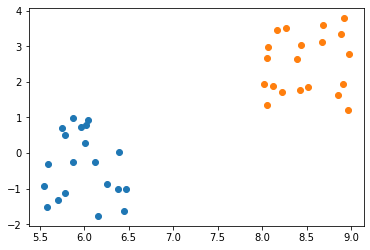

In [30]:
center1 = (5.5,-2)
center2 = (8, 4)
distance = 1


x1 = np.random.uniform(center1[0], center1[0] + distance, size=(20,))
y1 = np.random.uniform(center1[1], distance, size=(20,)) 

x2 = np.random.uniform(center2[0], center2[0] + distance, size=(20,))
y2 = np.random.uniform(center2[1], distance, size=(20,)) 

plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.show()

# 2. Decision Tree

<ipython-input-13-37ee66edb429>:30: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
<ipython-input-13-37ee66edb429>:30: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
<ipython-input-13-37ee66edb429>:30: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
<ipython-input-13-37ee66edb429>:30: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


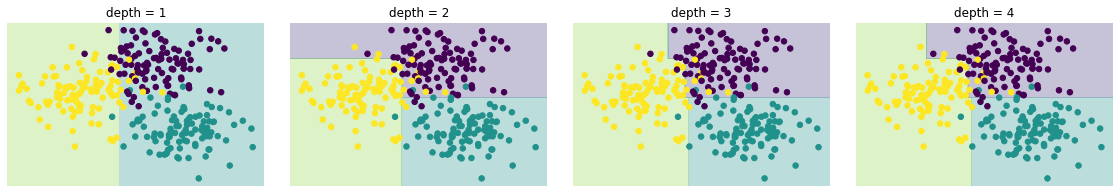

In [14]:
#from helpers_05_08 import visualize_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

        
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=3,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

#fig.savefig('figures/05.08-decision-tree-levels.png')

# 3. Bayes Classifier

The Bayes Classifier makes the assumption that the input data follow a gaussian distribution. Based on the Bayes theorem, the Bayes Classifier iteratively tries to find the optimal decision boundary between samples. 

**Exercise:** Implement the method `visualize_tree(estimator,x,y,boundaries,xlim=None,ylim=None,ax=None)` by yourself.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact


def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

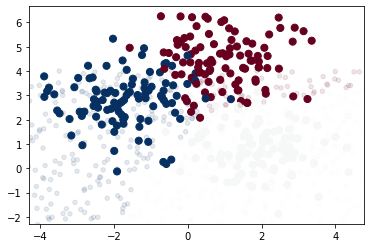

In [15]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

# 4. AdaBoosting Algorithm
The strength of AdaBoosting results from the cascadation of many weak classifiers of the output. This assumes that every weak classifier is minimally better than random guessing. Boosting is a specific example of a general class of learning algorithms calledensemble methods,which attempt to build better learning algorithms by combining multiple simpler algorithms. Thus, the final results of the boosting algorithm comprise of a linear combination of many week classifiers.

Suppose that we are given a training set $\{x_i,y_i\}^N_{i=n}$ with $x \in \mathbb{R}^K$. Further lets be given a ensemeble of weak classifiers such that $f_i(x) \in \{-1-1\}$ where the loss function $l$ can be stated by $

$l(f_m(\mathbf{x}),y)= 
\begin{cases}
    0,& \text{if } f_m(\mathbf{x}) = y_i\\
    1              & \text{if } f_m(\mathbf{x}) \ne y_i
\end{cases}$





After training the classifiers the final result can be comprises of a linear combination of weighted classifiers such that

$g(x) = \sum_{i=1}^m \alpha_m \cdot f_m(x) $.

The strong classifier results from updating the weights and adding one weak classifier at a time.

### Excercise:
Remember that for the output variable we want $y \in \{-1,1\}$. Create a dataset that `keras` that considers this restriction:

In [99]:
def dataset(n: int = 100, random_seed: int = None):
    """ Generate a toy dataset for evaluating AdaBoost classifiers """
    n_per_class = int(n/2)

    X, y = make_gaussian_quantiles(n_samples=n, n_features=2,n_classes=2)
    
    return X, y*2-1

X, y = make_toy_dataset(n=10, random_seed=10)


first = [X[i][0] for i in range(len(X))]
second = [X[i][1] for i in range(len(X))]

#lot_adaboost(X, y

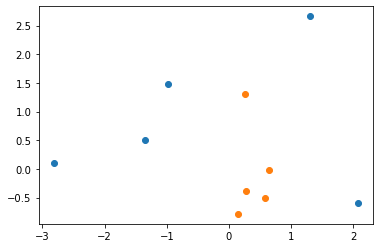

In [110]:
X_pos = X[y==1]
y_pos = y[y==1]
X_neg = X[y==-1]
y_neg = y[y==-1]
X_pos1 = [X_pos[i][0] for i in range(len(X_pos))]
X_pos2 = [X_pos[i][1] for i in range(len(X_pos))]
X_neg1 = [X_neg[i][0] for i in range(len(X_neg))]
X_neg2 = [X_neg[i][1] for i in range(len(X_neg))]
plt.scatter(X_pos1, X_pos2)
plt.scatter(X_neg1, X_neg2)
#plt.scatter(X_neg, y_neg)

In [89]:
from sklearn.ensemble import AdaBoostClassifier

bench = AdaBoostClassifier(n_estimators=10, algorithm='SAMME').fit(X, y)
#plot_adaboost(X, y, bench)

train_err = (bench.predict(X) != y).mean()
print(f'Train error: {train_err:.1%}')

#Train error: 0.0%


Train error: 0.0%


This handout gives a good overview of the algorithm, which is useful to understand before we touch any code.

A) Initialize sample weights uniformly as

.

B) For each iteration

:

    Find weak learner 

which minimizes
.
We set a weight for our weak learner based on its accuracy:
Increase weights of misclassified observations:
.
Renormalize weights, so that

    .

C) Make final prediction as weighted majority vote of weak learner predictions:
.

In [169]:
from typing import Optional
from sklearn.preprocessing import normalize
from sklearn.tree import DecisionTreeClassifier


class AdaBoostClassifier:
    def __init__(self):
        self.weight_sample = None
        self.cls = None
        self.cls_weight = None
        self.errors = None

    def _check_X_y(self, x: np.array, y:np.array) -> np.array:
        assert set(y) == {-1,1}
        return x,y

    def fit(self, x: np.array, y: np.array, iterat: int):
        self._check_X_y(x, y)
        
        n = x1.shape[0]
        
        self.weight_sample = np.zeros(shape=(iterat, n))
        self.cls = np.zeros(shape=iterat, dtype=object)
        self.cls_weights = np.zeros(shape=iterat)
        self.errors = np.zeros(shape=iterat)
        
        # initialize weights uniformly
        self.weight_sample[0] = np.ones(shape=n) / n
        
        for i in range(iterat):
            curr_sample_weight = self.weight_sample[i]
            cls = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
            
            print(len(X))
            cls = cls.fit(X,y,sample_weight=curr_sample_weight)
            
            predict_cls = cls.predict(X)
            epsilon = curr_sample_weight[predict_cls != y].sum()
            
            cl_alpha = np.log(1-epsilon/epsilon)/2
        
            cls_weights = weight.append(curr_sample_weight * np.exp(alpha*y*predict_cls))
            
            cls_weights = normalize(weights)
            
        return self
        
    def predict(self, X: np.array):
        cl = [cls.predict(X) for cls in self.cls]
        return np.sgn(np.dot(self.cl, self.cls_weights))
    
    def plot_adaboost(X: np.ndarray,
                      y: np.ndarray,
                      clf=None,
                      sample_weights: Optional[np.ndarray] = None,
                      annotate: bool = False,
                      #ax: Optional[mpl.axes.Axes] = None
                     ) -> None:
        plt.subplots(figsize= (10,10))

In [171]:
#ada = AdaBoostClassifier()
#ada.fit(second, y , 20) 

AdaBoostClassifier.fit = fit
AdaBoostClassifier.predict = predict

clf = AdaBoostClassifier().fit(X, y,10)
#plot_adaboost(X, y, clf)

train_err = (clf.predict(X) != y).mean()
print(f'Train error: {train_err:.1%}')

NameError: name 'predict' is not defined